---
# Cairo University Faculty of Engineering
## Deep Learning 
## Assignment 1 

---

Please write your full name here
- **Name** : "amr mohamed ali esmail"

# Part1: Numpy and Python

This exercise gives you a brief introduction to Python. Even if you've used Python before, this will help familiarize you with functions we'll need.

**Instructions:**

- You will be using Python 3.
- Avoid using for-loops and while-loops, unless you are explicitly told to do so.
- Do not modify the (# GRADED FUNCTION [function name]) comment in some cells. Your work would not be graded if you change this. Each cell containing that comment should only contain one function.
- After coding your function, run the cell right below it to check if your result is correct.

**After this part you will:**

- Be able to use iPython Notebooks
- Be able to use numpy functions and numpy matrix/vector operations
- Understand the concept of "broadcasting"
- Be able to vectorize code

**You only need to write code between the ### START CODE HERE ### and ### END CODE HERE ### comments.**

## 1 - Building basic functions with numpy ##

### 1.1 - sigmoid function ###

**Exercise**: Build a function that returns the sigmoid of a real number x. Use math.exp(x) for the exponential function.

**Reminder**:
$sigmoid(x) = \frac{1}{1+e^{-x}}$ is sometimes also known as the logistic function. It is a non-linear function used not only in Machine Learning (Logistic Regression), but also in Deep Learning.

<img src="./images/Sigmoid.png" style="width:500px;height:228px;">


In [1]:
# GRADED FUNCTION: basic_sigmoid

import math

def basic_sigmoid(x):
    """
    Compute sigmoid of x.

    Arguments:
    x -- A scalar

    Return:
    s -- sigmoid(x)
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    s = 1 / (1 + (math.exp(-1 * x)))
    
    ### END CODE HERE ###
    
    return s

In [2]:
basic_sigmoid(3)

0.9525741268224334

Actually, we rarely use the "math" library in deep learning because the inputs of the functions are real numbers. In deep learning we mostly use matrices and vectors. This is why numpy is more useful.

In [3]:
### One reason why we use "numpy" instead of "math" in Deep Learning ###
x = [1, 2, 3]
basic_sigmoid(x) # you will see this give an error when you run it, because x is a vector.

TypeError: must be real number, not list

Any time you need more info on a numpy function, we encourage you to look at [the official documentation](https://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.exp.html). 


**Exercise**: Implement the sigmoid function using numpy. 

**Instructions**: x could now be either a real number, a vector, or a matrix. 
$$ \text{For } x \in \mathbb{R}^n \text{,     } sigmoid(x) = sigmoid\begin{pmatrix}
    x_1  \\
    x_2  \\
    ...  \\
    x_n  \\
\end{pmatrix} = \begin{pmatrix}
    \frac{1}{1+e^{-x_1}}  \\
    \frac{1}{1+e^{-x_2}}  \\
    ...  \\
    \frac{1}{1+e^{-x_n}}  \\
\end{pmatrix}\tag{1} $$

In [4]:
# GRADED FUNCTION: sigmoid

import numpy as np # this means you can access numpy functions by writing np.function() instead of numpy.function()

def sigmoid(x):
    """
    Compute the sigmoid of x

    Arguments:
    x -- A scalar or numpy array of any size

    Return:
    s -- sigmoid(x)
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    s = 1 / (1 + (np.exp(-1 * x)))
    ### END CODE HERE ###
    
    return s

In [5]:
x = np.array([1, 2, 3])
sigmoid(x)

array([0.73105858, 0.88079708, 0.95257413])

### 1.2 - Sigmoid gradient

As you've seen, you will need to compute gradients to optimize loss functions. Let's code your first gradient function.

**Exercise**: Implement the function sigmoid_grad() to compute the gradient of the sigmoid function with respect to its input x. The formula is: $$sigmoid\_derivative(x) = \sigma'(x) = \sigma(x) (1 - \sigma(x))\tag{2}$$
You often code this function in two steps:
1. Set s to be the sigmoid of x. You might find your sigmoid(x) function useful.
2. Compute $\sigma'(x) = s(1-s)$

In [6]:
# GRADED FUNCTION: sigmoid_derivative

def sigmoid_derivative(x):
    """
    Compute the gradient (also called the slope or derivative) of the sigmoid function with respect to its input x.
    You can store the output of the sigmoid function into variables and then use it to calculate the gradient.
    
    Arguments:
    x -- A scalar or numpy array

    Return:
    ds -- Your computed gradient.
    """
    
    ### START CODE HERE ### (≈ 2 lines of code)
    s = sigmoid(x)
    ds = s * (1 - s)
    ### END CODE HERE ###
    
    return ds

In [7]:
x = np.array([1, 2, 3])
print ("sigmoid_derivative(x) = " + str(sigmoid_derivative(x)))

sigmoid_derivative(x) = [0.19661193 0.10499359 0.04517666]


### 1.3 - Reshaping arrays ###

Two common numpy functions used in deep learning are [np.shape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html) and [np.reshape()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html). 
- X.shape is used to get the shape (dimension) of a matrix/vector X. 
- X.reshape(...) is used to reshape X into some other dimension. 

For example, in computer science, an image is represented by a 3D array of shape $(length, height, depth = 3)$. However, when you read an image as the input of an algorithm you convert it to a vector of shape $(length*height*3, 1)$. In other words, you "unroll", or reshape, the 3D array into a 1D vector.

<img src="./images/image2vector_kiank.png" style="width:500px;height:300;">

**Exercise**: Implement `image2vector()` that takes an input of shape (length, height, 3) and returns a vector of shape (length\*height\*3, 1). For example, if you would like to reshape an array v of shape (a, b, c) into a vector of shape (a*b,c) you would do:
``` python
v = v.reshape((v.shape[0]*v.shape[1], v.shape[2])) # v.shape[0] = a ; v.shape[1] = b ; v.shape[2] = c
```
- Please don't hardcode the dimensions of image as a constant. Instead look up the quantities you need with `image.shape[0]`, etc. 

In [11]:
# GRADED FUNCTION: image2vector
def image2vector(image):
    """
    Argument:
    image -- a numpy array of shape (length, height, depth)
    
    Returns:
    v -- a vector of shape (length*height*depth, 1)
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    v = image.reshape(image.shape[0]*image.shape[1]*image.shape[2],1)
    ### END CODE HERE ###
    
    return v

In [13]:
# This is a 3 by 3 by 2 array, typically images will be (num_px_x, num_px_y,3) where 3 represents the RGB values
image = np.array([[[ 0.67826139,  0.29380381],
        [ 0.90714982,  0.52835647],
        [ 0.4215251 ,  0.45017551]],

       [[ 0.92814219,  0.96677647],
        [ 0.85304703,  0.52351845],
        [ 0.19981397,  0.27417313]],

       [[ 0.60659855,  0.00533165],
        [ 0.10820313,  0.49978937],
        [ 0.34144279,  0.94630077]]])
print ("image2vector(image) = " + str(image2vector(image)))

image2vector(image) = [[0.67826139]
 [0.29380381]
 [0.90714982]
 [0.52835647]
 [0.4215251 ]
 [0.45017551]
 [0.92814219]
 [0.96677647]
 [0.85304703]
 [0.52351845]
 [0.19981397]
 [0.27417313]
 [0.60659855]
 [0.00533165]
 [0.10820313]
 [0.49978937]
 [0.34144279]
 [0.94630077]]


### 1.4 - Broadcasting and the softmax function ####
A very important concept to understand in numpy is "broadcasting". It is very useful for performing mathematical operations between arrays of different shapes. For the full details on broadcasting, you can read the official [broadcasting documentation](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html).

**Exercise**: Implement a softmax function using numpy. You can think of softmax as a normalizing function used when your algorithm needs to classify two or more classes. You will learn more about softmax later in the course.

**Instructions**:
- $ \text{for } x \in \mathbb{R}^{1\times n} \text{,     } softmax(x) = softmax(\begin{bmatrix}
    x_1  &&
    x_2 &&
    ...  &&
    x_n  
\end{bmatrix}) = \begin{bmatrix}
     \frac{e^{x_1}}{\sum_{j}e^{x_j}}  &&
    \frac{e^{x_2}}{\sum_{j}e^{x_j}}  &&
    ...  &&
    \frac{e^{x_n}}{\sum_{j}e^{x_j}} 
\end{bmatrix} $ 

- $\text{for a matrix } x \in \mathbb{R}^{m \times n} \text{,  $x_{ij}$ maps to the element in the $i^{th}$ row and $j^{th}$ column of $x$, thus we have: }$  $$softmax(x) = softmax\begin{bmatrix}
    x_{11} & x_{12} & x_{13} & \dots  & x_{1n} \\
    x_{21} & x_{22} & x_{23} & \dots  & x_{2n} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    x_{m1} & x_{m2} & x_{m3} & \dots  & x_{mn}
\end{bmatrix} = \begin{bmatrix}
    \frac{e^{x_{11}}}{\sum_{j}e^{x_{1j}}} & \frac{e^{x_{12}}}{\sum_{j}e^{x_{1j}}} & \frac{e^{x_{13}}}{\sum_{j}e^{x_{1j}}} & \dots  & \frac{e^{x_{1n}}}{\sum_{j}e^{x_{1j}}} \\
    \frac{e^{x_{21}}}{\sum_{j}e^{x_{2j}}} & \frac{e^{x_{22}}}{\sum_{j}e^{x_{2j}}} & \frac{e^{x_{23}}}{\sum_{j}e^{x_{2j}}} & \dots  & \frac{e^{x_{2n}}}{\sum_{j}e^{x_{2j}}} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    \frac{e^{x_{m1}}}{\sum_{j}e^{x_{mj}}} & \frac{e^{x_{m2}}}{\sum_{j}e^{x_{mj}}} & \frac{e^{x_{m3}}}{\sum_{j}e^{x_{mj}}} & \dots  & \frac{e^{x_{mn}}}{\sum_{j}e^{x_{mj}}}
\end{bmatrix} = \begin{pmatrix}
    softmax\text{(first row of x)}  \\
    softmax\text{(second row of x)} \\
    ...  \\
    softmax\text{(last row of x)} \\
\end{pmatrix} $$

#### Note
Note that "m" is used to represent the "number of training examples".
Softmax should be performed for all features of each training example, so softmax would be performed on the rows.

$m$ is the number of rows and $n$ is the number of columns.

In [27]:
# GRADED FUNCTION: softmax
import numpy as np
def softmax(x):
    """Calculates the softmax for each row of the input x.

    Your code should work for a row vector and also for matrices of shape (m,n).

    Argument:
    x -- A numpy matrix of shape (m,n)

    Returns:
    s -- A numpy matrix equal to the softmax of x, of shape (m,n)
    """
    
    ### START CODE HERE ### (≈ 3 lines of code)
    # Apply exp() element-wise to x to get x_exp. 
    x_exp = np.exp(x)
    # Create a vector x_sum that sums each row of x_exp. 
    x_sum = np.sum(x,axis=1)[:,np.newaxis]
    # Compute softmax(x) by dividing results of 2 previous steps. 
    s = x_exp / x_sum
    ### END CODE HERE ###
    
    return s

In [28]:
x = np.array([
    [9, 2, 5, 0, 0],
    [7, 5, 0, 0 ,0]])
print("softmax(x) = " + str(softmax(x)))

softmax(x) = [[5.06442745e+02 4.61816006e-01 9.27582244e+00 6.25000000e-02
  6.25000000e-02]
 [9.13860965e+01 1.23677633e+01 8.33333333e-02 8.33333333e-02
  8.33333333e-02]]


**Note**:
- If you print the shapes of x_exp, x_sum and s above and rerun the assessment cell, you will see that x_sum is of shape (2,1) while x_exp and s are of shape (2,5). **x_exp/x_sum** works due to python broadcasting.

<font color='blue'>
**What you need to remember:**
- np.exp(x) works for any np.array x and applies the exponential function to every coordinate
- the sigmoid function and its gradient
- image2vector is commonly used in deep learning
- np.reshape is widely used. In the future, you'll see that keeping your matrix/vector dimensions straight will go toward eliminating a lot of bugs. 
- numpy has efficient built-in functions
- broadcasting is extremely useful

### 2.1 Implement the L1 and L2 loss functions

**Exercise**: Implement the numpy vectorized version of the L1 loss. You may find the function abs(x) (absolute value of x) useful.

**Reminder**:
- The loss is used to evaluate the performance of your model. The bigger your loss is, the more different your predictions ($ \hat{y} $) are from the true values ($y$). In deep learning, you use optimization algorithms like Gradient Descent to train your model and to minimize the cost.
- L1 loss is defined as:
$$\begin{align*} & L_1(\hat{y}, y) = \sum_{i=0}^m|y^{(i)} - \hat{y}^{(i)}| \end{align*}\tag{6}$$

In [33]:
# GRADED FUNCTION: L1
def L1(yhat, y):
    """
    Arguments:
    yhat -- vector of size m (predicted labels)
    y -- vector of size m (true labels)
    
    Returns:
    loss -- the value of the L1 loss function defined above
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    loss = np.abs((yhat - y)).sum()
    ### END CODE HERE ###
    
    return loss

In [34]:
yhat = np.array([.9, 0.2, 0.1, .4, .9])
y = np.array([1, 0, 0, 1, 1])
print("L1 = " + str(L1(yhat,y)))

L1 = 1.1


**Exercise**: Implement the numpy vectorized version of the L2 loss. There are several way of implementing the L2 loss but you may find the function np.dot() useful. As a reminder, if $x = [x_1, x_2, ..., x_n]$, then `np.dot(x,x)` = $\sum_{j=0}^n x_j^{2}$. 

- L2 loss is defined as $$\begin{align*} & L_2(\hat{y},y) = \sum_{i=0}^m(y^{(i)} - \hat{y}^{(i)})^2 \end{align*}\tag{7}$$

In [35]:
# GRADED FUNCTION: L2

def L2(yhat, y):
    """
    Arguments:
    yhat -- vector of size m (predicted labels)
    y -- vector of size m (true labels)
    
    Returns:
    loss -- the value of the L2 loss function defined above
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    loss = np.square((yhat - y)).sum()
    ### END CODE HERE ###
    
    return loss

In [36]:
yhat = np.array([.9, 0.2, 0.1, .4, .9])
y = np.array([1, 0, 0, 1, 1])
print("L2 = " + str(L2(yhat,y)))

L2 = 0.43


<font color='blue'>
**What to remember:**
- Vectorization is very important in deep learning. It provides computational efficiency and clarity.
- You have reviewed the L1 and L2 loss.
- You are familiar with many numpy functions such as np.sum, np.dot, np.multiply, np.maximum, etc...

# Part2: Intro to TensorFlow

In this assignment, you'll get exposure to using TensorFlow and learn how it can be used for solving deep learning tasks. Go through the code and run each cell. Along the way, you'll encounter several ***TODO*** blocks -- follow the instructions to fill them out before running those cells and continuing.

In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

## 1.1 Why is TensorFlow called TensorFlow?

TensorFlow is called 'TensorFlow' because it handles the flow (node/mathematical operation) of Tensors, which are data structures that you can think of as multi-dimensional arrays. Tensors are represented as n-dimensional arrays of base dataypes such as a string or integer -- they provide a way to generalize vectors and matrices to higher dimensions.

The ```shape``` of a Tensor defines its number of dimensions and the size of each dimension. The ```rank``` of a Tensor provides the number of dimensions (n-dimensions) -- you can also think of this as the Tensor's order or degree.

In [9]:
### Defining higher-order Tensors ###

'''TODO: Define a 2-d Tensor'''
matrix = tf.zeros(shape=(2,4),dtype=tf.int32)

assert isinstance(matrix, tf.Tensor), "matrix must be a tf Tensor object"
assert tf.rank(matrix).numpy() == 2

In [8]:
'''TODO: Define a 4-d Tensor.'''
# Use tf.zeros to initialize a 4-d Tensor of zeros with size 10 x 256 x 256 x 3. 
#   You can think of this as 10 images where each image is RGB 256 x 256.
images = tf.zeros(shape=(10,256,256,3),dtype=tf.int32)

assert isinstance(images, tf.Tensor), "matrix must be a tf Tensor object"
assert tf.rank(images).numpy() == 4, "matrix must be of rank 4"
assert tf.shape(images).numpy().tolist() == [10, 256, 256, 3], "matrix is incorrect shape"

## 1.2 Computations on Tensors

A convenient way to think about and visualize computations in TensorFlow is in terms of graphs. We can define this graph in terms of Tensors, which hold data, and the mathematical operations that act on these Tensors in some order. Let's look at a simple example, and define this computation using TensorFlow:

![alt text](https://raw.githubusercontent.com/aamini/introtodeeplearning/master/lab1/img/add-graph.png)

In [ ]:
# Create the nodes in the graph, and initialize values
a = tf.constant(15)
b = tf.constant(61)

# Add them!
c1 = tf.add(a,b)
c2 = a + b # TensorFlow overrides the "+" operation so that it is able to act on Tensors
print(c1)
print(c2)

Notice how we've created a computation graph consisting of TensorFlow operations, and how  the output is a Tensor with value 76 -- we've just created a computation graph consisting of operations, and it's executed them and given us back the result.

Now let's consider a slightly more complicated example:

![alt text](https://raw.githubusercontent.com/aamini/introtodeeplearning/master/lab1/img/computation-graph.png)

Here, we take two inputs, `a, b`, and compute an output `e`. Each node in the graph represents an operation that takes some input, does some computation, and passes its output to another node.

Let's define a simple function in TensorFlow to construct this computation function:

In [10]:
### Defining Tensor computations ###

# Construct a simple computation function
def func(a,b):
  '''TODO: Define the operation for c, d, e (use tf.add, tf.subtract, tf.multiply).'''
  c = tf.add(a,b)
  d = tf.subtract(b,1)
  e = tf.multiply(c,d)
  return e

Now, we can call this function to execute the computation graph given some inputs `a,b`:

In [11]:
# Consider example values for a,b
a, b = 1.5, 2.5
# Execute the computation
e_out = func(a,b)
print(e_out)

tf.Tensor(6.0, shape=(), dtype=float32)


Notice how our output is a Tensor with value defined by the output of the computation, and that the output has no shape as it is a single scalar value.

In [ ]:
### Gradient computation with GradientTape ###

# y = x^2
# Example: x = 3.0
x = tf.Variable(3.0)

# Initiate the gradient tape
with tf.GradientTape() as tape:
  # Define the function
  y = x * x
# Access the gradient -- derivative of y with respect to x
dy_dx = tape.gradient(y, x)

assert dy_dx.numpy() == 6.0

In training neural networks, we use differentiation and stochastic gradient descent (SGD) to optimize a loss function. Now that we have a sense of how `GradientTape` can be used to compute and access derivatives, we will look at an example where we use automatic differentiation and SGD to find the minimum of $L=(x-x_f)^2$. Here $x_f$ is a variable for a desired value we are trying to optimize for; $L$ represents a loss that we are trying to  minimize. While we can clearly solve this problem analytically ($x_{min}=x_f$), considering how we can compute this using `GradientTape` sets us up nicely for future labs where we use gradient descent to optimize entire neural network losses.

Initializing x=[[0.7042074]]


Text(0, 0.5, 'x value')

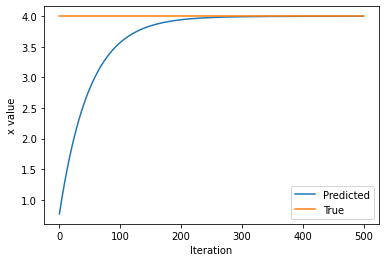

In [13]:
### Function minimization with automatic differentiation and SGD ###

# Initialize a random value for our initial x
x = tf.Variable([tf.random.normal([1])])
print("Initializing x={}".format(x.numpy()))

learning_rate = 1e-2 # learning rate for SGD
history = []
# Define the target value
x_f = 4

# We will run SGD for a number of iterations. At each iteration, we compute the loss, 
#   compute the derivative of the loss with respect to x, and perform the SGD update.
for i in range(500):
  with tf.GradientTape() as tape:
    '''TODO: define the loss as described above'''
    loss = (x - x_f) * (x - x_f)
    # loss minimization using gradient tape
    grad = tape.gradient(loss, x) # compute the derivative of the loss with respect to x
    new_x = x - learning_rate*grad # sgd update
    x.assign(new_x) # update the value of x
    history.append(x.numpy()[0])

# Plot the evolution of x as we optimize towards x_f!
plt.plot(history)
plt.plot([0, 500],[x_f,x_f])
plt.legend(('Predicted', 'True'))
plt.xlabel('Iteration')
plt.ylabel('x value')

`GradientTape` provides an extremely flexible framework for automatic differentiation. In order to back propagate errors through a neural network, we track forward passes on the Tape, use this information to determine the gradients, and then use these gradients for optimization using SGD.

In [ ]:
# Copyright 2022 MIT 6.S191
# © MIT 6.S191: Introduction to Deep Learning


## 1.3 A neural Network

In the tutorial we learned how to create a network model that predicts the handwritten digits from the MNIST dataset. This time we are trying recognize different items of clothing, trained from a dataset containing 10 different types.

The Fashion MNIST data is available directly in the tf.keras datasets API. You load it like this:

### Question 1 Loading and Viewing data

The Fashion MNIST data is available directly in the tf.keras datasets API. 
- **Q** Load it like we did in the tutorial from keras.

In [14]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4431872/4422102 [==============================] - 3s 1us/step


The Fashion MNIST data is available directly in the tf.keras datasets API. 
- **Q** Normalize it like we did in the tutorial.

In [15]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

- **Q** Display 9 *random* images from the training images.

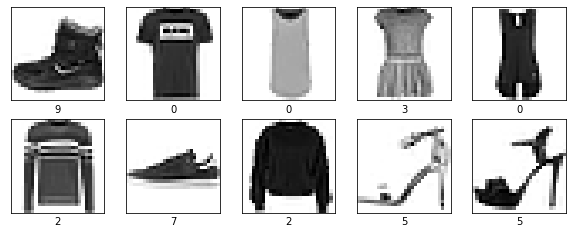

In [16]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(training_images[i], cmap=plt.cm.binary)
    plt.xlabel(training_labels[i])
plt.show()

### Question 2 The Model

Let's now design the model. Run the following cells

In [23]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [24]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4691 - accuracy: 0.8332
Epoch 2/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.3558 - accuracy: 0.8706
Epoch 3/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3219 - accuracy: 0.8809
Epoch 4/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2958 - accuracy: 0.8907
Epoch 5/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2773 - accuracy: 0.8966


Run the below code: It creates a set of classifications for each of the test images, and then prints the first entry in the classifications. The output, after you run it is a list of numbers.

In [19]:
classifications = model.predict(test_images)

print(classifications[0])

[1.1367983e-05 1.1370112e-08 3.7685328e-07 2.1438711e-07 2.3989380e-06
 1.2150209e-03 4.5197717e-06 8.8229120e-02 1.0379460e-05 9.1052651e-01]


Hint: try running print(test_labels[0]) -- and you'll get a 9. Does that help you understand why this list looks the way it does? 

In [20]:
print(test_labels[0])

9


- **Q** What does this list represent?


1.   It's 10 random meaningless values
2.   It's the first 10 classifications that the computer made
3.   It's the probability that this item is each of the 10 classes


- TODO (3 - It's the probability that this item is each of the 10 classes)

**Q** How do you know that this list tells you that the item is an ankle boot?


1.   There's not enough information to answer that question
2.   The 10th element on the list is the biggest, and the ankle boot is labelled 9
2.   The ankle boot is label 9, and there are 0->9 elements in the list


- TODO (2 - The 10th element on the list is the biggest, and the ankle boot is labelled 9)

Let's now look at the layers in your model. Experiment with different values for the dense layer with 512 neurons. What different results do you get for loss, training time etc? Why do you think that's the case? 


**Q** Increase to 1024 Neurons -- What's the impact?

1. Training takes longer, but is more accurate
2. Training takes longer, but no impact on accuracy
3. Training takes the same time, but is more accurate


- TODO (2- Training takes longer, but no impact on accuracy)

In [26]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.8.0
Epoch 1/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1858
Epoch 2/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0739
Epoch 3/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0495
Epoch 4/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0342
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 0.0694
[6.5739608e-11 1.0209453e-09 1.1273155e-08 6.7976889e-06 3.3556101e-14
 8.3598357e-11 3.3955095e-13 9.9999309e-01 5.7609911e-10 6.5306175e-08]
7


**Q** What would happen if you remove the Flatten() layer. Why do you think that's the case? 

- TODO (because each node in the input layer has to get an one input but without flatten it has a vector input)

In [29]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.8.0
Epoch 1/5


ValueError: in user code:

    File "d:\sbme\fourth year\second term\DeepL\ass1\.venv\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "d:\sbme\fourth year\second term\DeepL\ass1\.venv\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "d:\sbme\fourth year\second term\DeepL\ass1\.venv\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "d:\sbme\fourth year\second term\DeepL\ass1\.venv\lib\site-packages\keras\engine\training.py", line 860, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "d:\sbme\fourth year\second term\DeepL\ass1\.venv\lib\site-packages\keras\engine\training.py", line 918, in compute_loss
        return self.compiled_loss(
    File "d:\sbme\fourth year\second term\DeepL\ass1\.venv\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "d:\sbme\fourth year\second term\DeepL\ass1\.venv\lib\site-packages\keras\losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "d:\sbme\fourth year\second term\DeepL\ass1\.venv\lib\site-packages\keras\losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "d:\sbme\fourth year\second term\DeepL\ass1\.venv\lib\site-packages\keras\losses.py", line 1862, in sparse_categorical_crossentropy
        return backend.sparse_categorical_crossentropy(
    File "d:\sbme\fourth year\second term\DeepL\ass1\.venv\lib\site-packages\keras\backend.py", line 5202, in sparse_categorical_crossentropy
        res = tf.nn.sparse_softmax_cross_entropy_with_logits(

    ValueError: `labels.shape` must equal `logits.shape` except for the last dimension. Received: labels.shape=(32,) and logits.shape=(896, 10)


**Q** Consider the final (output) layers. Why are there 10 of them? What would happen if you had a different amount than 10? For example, try training the network with 5

- TODO (they are 10 because there are 10 categories if we reduced the number to 5 it will give us an error becuase the shape of the labels not as same as the number of the nodes at the output layers)

In [28]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(5, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.8.0
Epoch 1/5


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "C:\Users\amr\AppData\Local\Programs\Python\Python38\lib\runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\amr\AppData\Local\Programs\Python\Python38\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "d:\sbme\fourth year\second term\DeepL\ass1\.venv\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "d:\sbme\fourth year\second term\DeepL\ass1\.venv\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "d:\sbme\fourth year\second term\DeepL\ass1\.venv\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "d:\sbme\fourth year\second term\DeepL\ass1\.venv\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\amr\AppData\Local\Programs\Python\Python38\lib\asyncio\base_events.py", line 570, in run_forever
      self._run_once()
    File "C:\Users\amr\AppData\Local\Programs\Python\Python38\lib\asyncio\base_events.py", line 1859, in _run_once
      handle._run()
    File "C:\Users\amr\AppData\Local\Programs\Python\Python38\lib\asyncio\events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "d:\sbme\fourth year\second term\DeepL\ass1\.venv\lib\site-packages\ipykernel\kernelbase.py", line 471, in dispatch_queue
      await self.process_one()
    File "d:\sbme\fourth year\second term\DeepL\ass1\.venv\lib\site-packages\ipykernel\kernelbase.py", line 460, in process_one
      await dispatch(*args)
    File "d:\sbme\fourth year\second term\DeepL\ass1\.venv\lib\site-packages\ipykernel\kernelbase.py", line 367, in dispatch_shell
      await result
    File "d:\sbme\fourth year\second term\DeepL\ass1\.venv\lib\site-packages\ipykernel\kernelbase.py", line 662, in execute_request
      reply_content = await reply_content
    File "d:\sbme\fourth year\second term\DeepL\ass1\.venv\lib\site-packages\ipykernel\ipkernel.py", line 360, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "d:\sbme\fourth year\second term\DeepL\ass1\.venv\lib\site-packages\ipykernel\zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "d:\sbme\fourth year\second term\DeepL\ass1\.venv\lib\site-packages\IPython\core\interactiveshell.py", line 2854, in run_cell
      result = self._run_cell(
    File "d:\sbme\fourth year\second term\DeepL\ass1\.venv\lib\site-packages\IPython\core\interactiveshell.py", line 2900, in _run_cell
      return runner(coro)
    File "d:\sbme\fourth year\second term\DeepL\ass1\.venv\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "d:\sbme\fourth year\second term\DeepL\ass1\.venv\lib\site-packages\IPython\core\interactiveshell.py", line 3098, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "d:\sbme\fourth year\second term\DeepL\ass1\.venv\lib\site-packages\IPython\core\interactiveshell.py", line 3301, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "d:\sbme\fourth year\second term\DeepL\ass1\.venv\lib\site-packages\IPython\core\interactiveshell.py", line 3361, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\amr\AppData\Local\Temp\ipykernel_9580\3076966402.py", line 18, in <cell line: 18>
      model.fit(training_images, training_labels, epochs=5)
    File "d:\sbme\fourth year\second term\DeepL\ass1\.venv\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "d:\sbme\fourth year\second term\DeepL\ass1\.venv\lib\site-packages\keras\engine\training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "d:\sbme\fourth year\second term\DeepL\ass1\.venv\lib\site-packages\keras\engine\training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "d:\sbme\fourth year\second term\DeepL\ass1\.venv\lib\site-packages\keras\engine\training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "d:\sbme\fourth year\second term\DeepL\ass1\.venv\lib\site-packages\keras\engine\training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "d:\sbme\fourth year\second term\DeepL\ass1\.venv\lib\site-packages\keras\engine\training.py", line 860, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "d:\sbme\fourth year\second term\DeepL\ass1\.venv\lib\site-packages\keras\engine\training.py", line 918, in compute_loss
      return self.compiled_loss(
    File "d:\sbme\fourth year\second term\DeepL\ass1\.venv\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "d:\sbme\fourth year\second term\DeepL\ass1\.venv\lib\site-packages\keras\losses.py", line 141, in __call__
      losses = call_fn(y_true, y_pred)
    File "d:\sbme\fourth year\second term\DeepL\ass1\.venv\lib\site-packages\keras\losses.py", line 245, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "d:\sbme\fourth year\second term\DeepL\ass1\.venv\lib\site-packages\keras\losses.py", line 1862, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "d:\sbme\fourth year\second term\DeepL\ass1\.venv\lib\site-packages\keras\backend.py", line 5202, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
Received a label value of 9 which is outside the valid range of [0, 5).  Label values: 2 1 8 8 7 6 3 5 9 2 0 2 9 8 8 6 2 1 5 3 4 4 9 8 5 6 9 5 5 3 9 2
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_166032]

**Q** Before you trained, you normalized the data, going from values that were 0-255 to values that were 0-1. What would be the impact of removing that? Here's the complete code to give it a try. Why do you think you get different results? 

- TODO (this is beacuse the weights on each layer will be adjusted differently according to the input distribution)

In [32]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# training_images=#TODO
# test_images=#TODO
# training_images = training_images/255.0
# test_images = test_images/255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

2.8.0
Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 2.6126
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3299
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2965
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2722
Epoch 5/5
313/313 [==============================] - 2s 4ms/step - loss: 0.2702
[6.5936604e-37 6.5981122e-15 1.9820649e-15 1.4094906e-13 1.2775430e-21
 2.9250762e-26 1.8080644e-33 1.0000000e+00 1.9122956e-14 6.4327825e-17]
7
